# Search Prediction

> A highly flexible model for forecasting search clicks for a given budget

In [ ]:
#| hide
import warnings

In [ ]:
#| hide
warnings.filterwarnings("ignore", category=Warning)

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
#| hide
from typing import Callable, Tuple, Protocol
from abc import ABC, abstractmethod

from pymc_marketing.mmm.transformers import batched_convolution
import pymc_marketing as pm_mrk
from pymc_marketing.prior import handle_dims
import pymc as pm
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd

import pytensor.tensor as pt
import dowhy

from search_forecast.utils.data_gen import generate_data_search_data
from search_forecast.wrapper.pymc_wrapper import (
    Prior, HSGP, HSGPPeriodic,
    YearlyFourier, Data
)
from search_forecast.utils.data_gen import (
    hill
)

In [ ]:
#| hide
causal_graph = """digraph {
geo -> search_volume;
time -> search_volume;
time -> budget;
time -> observed_clicks;
geo -> budget;
budget -> impressions;
search_volume -> impressions;
impressions -> observed_clicks;
}"""

In [ ]:
#| hide
data = generate_data_search_data()

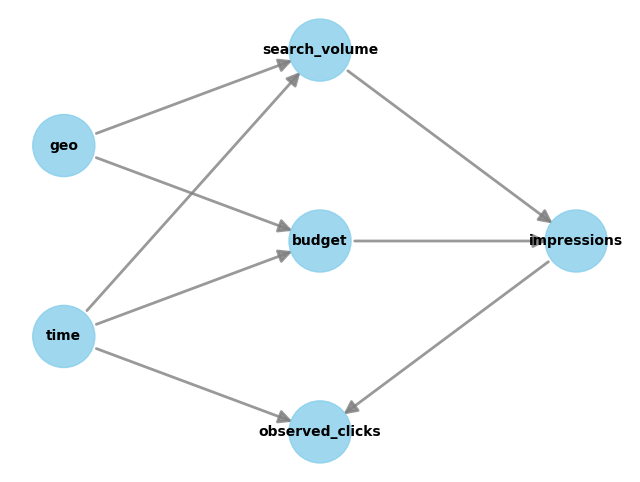

In [ ]:
model = dowhy.CausalModel(
    data=data.to_dataframe(),
    graph=causal_graph.replace("\n", " "),
    treatment="budget",
    outcome="observed_clicks",
)
model.view_model()

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()